**Nombres y matrículas de los integrantes del equipo:**

*   Genaro Rodriguez Vazquez A01150931
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [111]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

from matplotlib.cbook import print_cycles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import seaborn as sns 
from tabulate import tabulate

from sklearn.pipeline import Pipeline
#from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
#from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score

#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


from sklearn.metrics import classification_report, make_scorer
#from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

#**Ejercicio-1.** 

In [112]:
#def LoadandFormatData():
df = pd.read_csv('SouthGermanCredit.asc', sep=" ")


df = df.rename(columns={"laufkont":"status"})
df = df.rename(columns={"laufzeit":"duration"})
df = df.rename(columns={"moral":"credit_history"})
df = df.rename(columns={"verw":"purpose"})
df = df.rename(columns={"hoehe":"amount"})
df = df.rename(columns={"sparkont":"savings"})
df = df.rename(columns={"beszeit":"employment_duration"})
df = df.rename(columns={"rate":"installment_rate"})
df = df.rename(columns={"famges":"personal_status_sex"})
df = df.rename(columns={"buerge":"other_debtors"})
df = df.rename(columns={"wohnzeit":"present_residence"})
df = df.rename(columns={"verm":"property"})
df = df.rename(columns={"alter":"age"})
df = df.rename(columns={"weitkred":"other_installment_plans"})
df = df.rename(columns={"wohn":"housing"})
df = df.rename(columns={"bishkred":"number_credits"})
df = df.rename(columns={"beruf":"job"})
df = df.rename(columns={"pers":"people_liable"})
df = df.rename(columns={"telef":"telephone"})
df = df.rename(columns={"gastarb":"foreign_worker"})
df = df.rename(columns={"kredit":"credit_risk"})   #This is our output variable to predict "Y"
#return df

#df = LoadandFormatData()    
pd.get_option("display.max_columns", None)
df.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


#**Ejercicio-3a.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas
para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de
cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal
(discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha
información realiza un Pipeline que incluya al menos las siguientes transformaciones:

Ejercicio 3.-a
Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable
(decide y justifica que tipo de imputación realizas en cada caso).

In [113]:
#def ImputateData(df):
#All types int64 and float64 are 'quantitative' type
# Binary and categorical types have their description underneath

#Variable ordinal, se queda como int64
#df = df.astype({"status":"category"})
""" 1 : no checking account                       
2 : ... < 0 DM                                
3 : 0<= ... < 200 DM                          
4 : ... >= 200 DM / salary for at least 1 year"""

df = df.astype({"duration":"int64"})

df = df.astype({"credit_history":"category"})
"""0 : delay in paying off in the past            
1 : critical account/other credits elsewhere   
2 : no credits taken/all credits paid back duly
3 : existing credits paid back duly till now   
4 : all credits at this bank paid back duly  """

df = df.astype({"purpose":"category"})
""" 0 : others             
1 : car (new)          
2 : car (used)         
3 : furniture/equipment
4 : radio/television   
5 : domestic appliances
6 : repairs            
7 : education          
8 : vacation           
9 : retraining         
10 : business """

df = df.astype({"amount":"int64"})

#Variable ordinal, se queda como int64
#df = df.astype({"savings":"category"})
""" 1 : unknown/no savings account
2 : ... <  100 DM             
3 : 100 <= ... <  500 DM      
4 : 500 <= ... < 1000 DM      
5 : ... >= 1000 DM   """

#Variable ordinal, se queda como int64
#df = df.astype({"employment_duration":"category"})
""" 1 : unemployed      
2 : < 1 yr          
3 : 1 <= ... < 4 yrs
4 : 4 <= ... < 7 yrs
5 : >= 7 yrs     """

#Variable ordinal, se queda como int64
#df = df.astype({"installment_rate":"int64"})
""" 
 1 : >= 35         
 2 : 25 <= ... < 35
 3 : 20 <= ... < 25
 4 : < 20   
"""

df = df.astype({"personal_status_sex":"category"})
""" 1 : male : divorced/separated           
2 : female : non-single or male : single
3 : male : married/widowed              
4 : female : single     """

df = df.astype({"other_debtors":"category"})
""" 1 : none        
2 : co-applicant
3 : guarantor   """

#Variable ordinal, se queda como int64
#df = df.astype({"present_residence":"category"})
"""" 1 : < 1 yr          
2 : 1 <= ... < 4 yrs
3 : 4 <= ... < 7 yrs
4 : >= 7 yrs    """

df = df.astype({"property":"category"})
""" 1 : unknown / no property                    
2 : car or other                             
3 : building soc. savings agr./life insurance
4 : real estate     """

df = df.astype({"age":"int64"})

df = df.astype({"other_installment_plans":"category"})
""" 1 : bank  
2 : stores
3 : none  """

df = df.astype({"housing":"category"})
""" 1 : for free
2 : rent    
3 : own   """

#Variable ordinal, se queda como int64
#df = df.astype({"number_credits":"category"})
""" 1 : 1   
2 : 2-3 
3 : 4-5 
4 : >= 6"""

#NO ES ORDINAL
df = df.astype({"job":"category"})
""" 1 : unemployed/unskilled - non-resident       
2 : unskilled - resident                      
3 : skilled employee/official                 
4 : manager/self-empl./highly qualif. employee"""


df = df.astype({"people_liable":"category"})
""" 1 : 3 or more
2 : 0 to 2   """

########### BINARY DATA SHOULD ACTUALLY NOT BE ONE-HOT  ENCODED!!!!!!           ############
########### Too many X inputs are prone to overfit the model                   ###########
########### In a nutshell, converting a binary variable into a one-hot encoded  ###########
########### one is redundant and may lead to troubles that are needless         ###########
########### and unsolicited. Although correlated features may not always        ###########
########### worsen your model, yet they will not always improve it either.      ###########

#df = df.astype({"telephone":"bool"})
""" 1 : no                       
2 : yes (under customer name)"""

#df = df.astype({"foreign_worker":"bool"})
""" 1 : yes
2 : no """

#df = df.astype({"credit_risk":"bool"}) #This is our output variable to predict "Y"
""" 0 : bad 
1 : good"""

print(df.dtypes)

#ImputateData(df)

status                        int64
duration                      int64
credit_history             category
purpose                    category
amount                        int64
savings                       int64
employment_duration           int64
installment_rate              int64
personal_status_sex        category
other_debtors              category
present_residence             int64
property                   category
age                           int64
other_installment_plans    category
housing                    category
number_credits                int64
job                        category
people_liable              category
telephone                     int64
foreign_worker                int64
credit_risk                   int64
dtype: object


#**Ejercicio-3.b  y  3c**

In [114]:
#def Analyze_dtypes_as_baseline(df):
"""Ejercicio 3.-b
Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una
transformación que escale a todas ellas en un rango equiparable."""

df_quantitative = df[['status','duration', 'amount', 'savings', 'employment_duration','installment_rate', 'present_residence','age', 'job', 'number_credits']].copy()
#print(df_quantitative)

#Just to see how they change
df_quantitative_normalized = scaler.fit_transform(df_quantitative.to_numpy())
df_quantitative_normalized = pd.DataFrame(df_quantitative_normalized, columns=['status','duration', 'amount', 'savings', 'employment_duration',
'installment_rate', 'present_residence','age', 'job', 'number_credits'])
#print(df_quantitative_normalized)


"""
Ejercicio 3.-c
Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y
binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la
transformación one-hot encoding. Por el momento dejar las variables ordinales sin
transformar.
"""
#'Getting only binary input variables' (REMEMBER:credit_risk is the output)
df_binary = df[['telephone', 'foreign_worker','credit_risk']].copy()
#Hot-encoding
pd.get_dummies(df_binary)
#print(df_binary)

#'Getting only category input variables' (
df_category = df[[ 'credit_history', 'purpose'
, 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans'
, 'housing', 'people_liable']].copy()
#Hot-encoding
df_category = pd.get_dummies(df_category)
df_category
print(df_category)
    
#Analyze_dtypes_as_baseline(df)    

     credit_history_0  credit_history_1  credit_history_2  credit_history_3  \
0                   0                 0                 0                 0   
1                   0                 0                 0                 0   
2                   0                 0                 1                 0   
3                   0                 0                 0                 0   
4                   0                 0                 0                 0   
..                ...               ...               ...               ...   
995                 0                 0                 1                 0   
996                 0                 0                 1                 0   
997                 0                 0                 0                 0   
998                 0                 0                 1                 0   
999                 0                 0                 1                 0   

     credit_history_4  purpose_0  purpose_1  purpos

#**This are our own formulas for scoring:**

In [115]:
def mi_cm(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)

  txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
  vf = [ '( VN )', '( FP )', '( FN )', '( VP )']
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(txt,vf, frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(2,2)

  plt.figure(figsize=(6,4));
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Pastel1', cbar=False);
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción");
  plt.show();

def mi_precision(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)
    tot = cm.sum()
    fp = 100*cm[0,1] / tot
    vp = 100*cm[1,1] / tot
    precision = vp / ( vp+fp)
    return precision
def mi_recall(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)
    tot = cm.sum()
    fn = 100*cm[1,0] / tot
    vp = 100*cm[1,1] / tot
    recall = vp / (vp+fn)
    return recall  
def mi_f1score(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)
    tot = cm.sum()
    fp = 100*cm[0,1] / tot
    fn = 100*cm[1,0] / tot
    vp = 100*cm[1,1] / tot
    f1score = 2*vp / (2*vp+fp+fn)  
    return f1score     
def mi_especificidad(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)
    tot = cm.sum()
    fp = 100*cm[0,1] / tot
    vn = 100*cm[0,0] / tot
    especificidad = vn / (vn+fp)  
    return especificidad      
def mi_gmean(yreal, ypred):
     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot
     f1 = vp / (vp+fn)
     especificidad = vn / (vn+fp)
     gmean = np.sqrt(f1 * especificidad)
     #display(gmean)   
     return gmean    

Our list of models to try and score:

In [116]:
def get_models():
    """
    Ejercicio 4.-a
    Usa los parámetros predeterminados de cada modelo. 
    """
    modelos = list()
    nombres = list()
    # LR - Regresión Logística:
    modelos.append(LogisticRegression(solver='lbfgs', max_iter=1000))   # Incializamos el modelo con los hiperparámetros predeterminados.
    nombres.append('LogisticReg')
    # DT - Arbol de decisiones:
    modelos.append(DecisionTreeClassifier())
    nombres.append('Decision Tree')
    # RF - Bosque aleatorio:
    modelos.append(RandomForestClassifier(n_estimators=10,  # número de árboles en el Forest y después promedia por votación.
                                    criterion='gini',       # métrica para determinar las ramas. También puede ser: 'entropy', para la GananciaDeInformación (IG).
                                    max_depth=2,            # Depth=k : máximo 2^k líneas/ramas.        
                                    min_samples_split = 6,  # mínimo de puntos muestrales requeridos en un nodo para hacer la ramificación. Puede ser fracción de 0 a 1.
                                    min_samples_leaf = 4,   # mínimo de puntos muestrales que deben quedar en cada nueva ramificación (hojas). Puede ser fracción de 0 a 1.
                                    max_features= 'sqrt',   # número de características (features) que se consideran en cada ramificación: auto=sqrt(n_features).
                                    max_leaf_nodes=16,      # solo nos quedamos con las mejores k hojas.
                                    bootstrap=True,         # Cada Árbol se muestrea seleccionando la cantidad de datos del conjunto de entrenamiento, pero con reemplazo. False:los datos usados en cada árbol simpre es el mismo, el Train-set.
                                    oob_score=False,        # en caso de utilizar Out-of-bag samples.
                                    verbose=0,              # tipo de despliega de información durante el entrenamiento.
                                    n_jobs=-1,              # total de hilos a usar en las rutinas paralelizables: "-1" :usar todos los posibles. 
                                    max_samples=None,       # Cuando se usa Boostrap, es el total de datos de Xtrain a usar en cada árbol. "None" usará Xtrain[0]. 
                                    random_state=19)
                                    )
    nombres.append('Random forest')
    return modelos, nombres

#**Ejercicio 4**

a. Usa los parámetros predeterminados de cada modelo.

b. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision,
f1, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes
definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn.
Sin embargo, sí puedes usar la información regresada por el método confusion_matrix()
de scikit-learn para definir las métricas).

c. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.

d. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como
para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la
métrica “f1”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu
respuesta.

(850, 20) : dimensión de datos de entrada "X" para entrenamiento y validación
(150, 20) : dimensión de datos de entrada "X" para prueba
(850,) : dimensión de variable de salida  "Y" para  entrenamiento y validación
(150,) : dimensión de variable de salida "Y" para prueba
Balanceo:  0.7


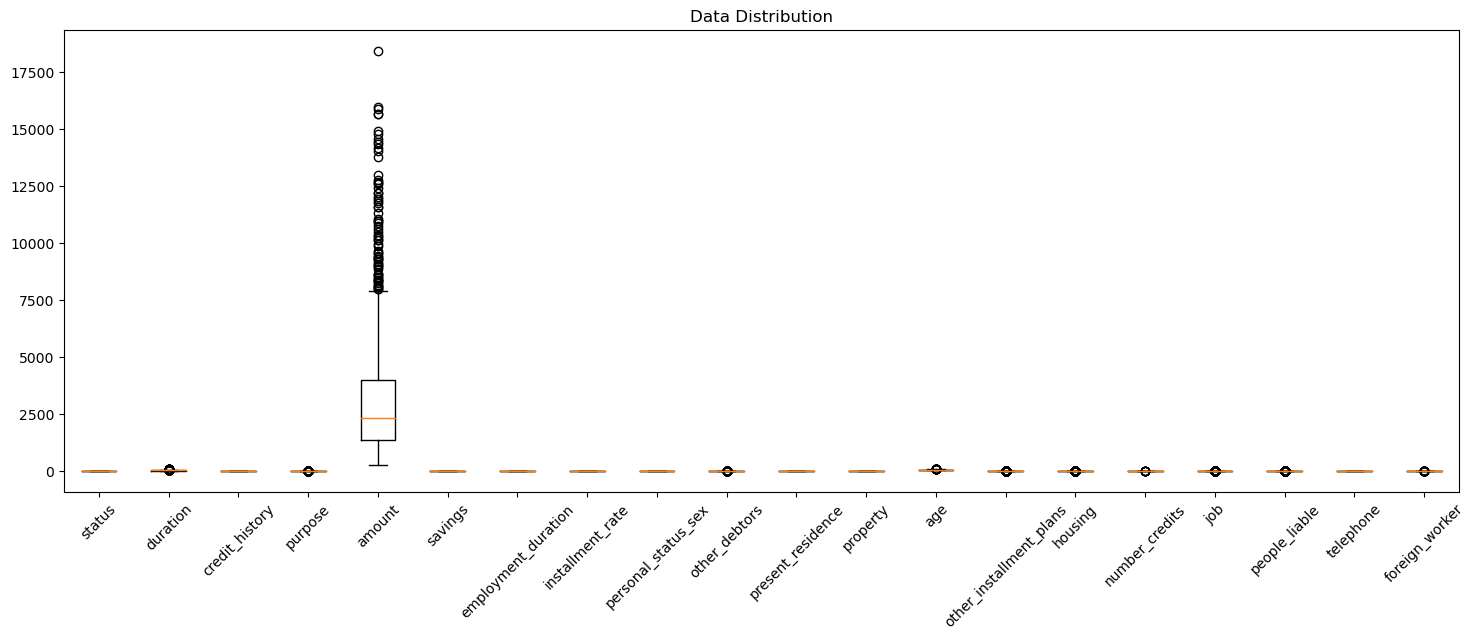

In [117]:
X = df.drop('credit_risk', axis='columns')  
y = df['credit_risk']  

#Ejercicio 2
#Training and validation are 80%       Testing is 20%
Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=.15, shuffle=True, random_state=1, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=.20, shuffle=True, random_state=1)

print(Xtv.shape, ': dimensión de datos de entrada "X" para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada "X" para prueba')  

print(ytv.shape, ': dimensión de variable de salida  "Y" para  entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida "Y" para prueba')

print("Balanceo: " , ytv.sum() / ytv.shape[0])

plt.figure(figsize= (18, 6))
plt.boxplot(X, labels=X.columns)
plt.title("Data Distribution")
plt.xticks(rotation = 45);
plt.show()

In [118]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['status','duration', 'amount', 'savings', 'employment_duration',
'installment_rate', 'present_residence','age', 'number_credits']



# Transformaciones a factores binarios de entrada (en caso de que falten datos):
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = ['telephone', 'foreign_worker']

# Transformaciones a factores categóricos de entrada:
catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first', handle_unknown = "ignore"))])
catOHE_pipeline_nombres = ['credit_history', 'purpose'
, 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans'
, 'housing', 'job', 'people_liable']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')                                        


"""Ejercicio 4.-b
En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, 
f1, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes 
definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. 
Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() 
de scikit-learn para definir las métricas)."""
modelos, nombres = get_models()  # cargamos los modelos a comparar


Printing on a beautiful table:
| Random forest   |   test_precision |   train_precision |   test_recall |   train_recall |   test_f1score |   train_f1score |   test_gmean |   train_gmean |
|-----------------|------------------|-------------------|---------------|----------------|----------------|-----------------|--------------|---------------|
| LogisticReg     |             0.79 |              0.82 |          0.88 |           0.91 |           0.83 |            0.86 |         0.64 |          0.70 |
| Decision Tree   |             0.77 |              1.00 |          0.77 |           1.00 |           0.77 |            1.00 |         0.60 |          1.00 |
| Random forest   |             0.70 |              0.70 |          1.00 |           1.00 |           0.82 |            0.83 |         0.05 |          0.13 |


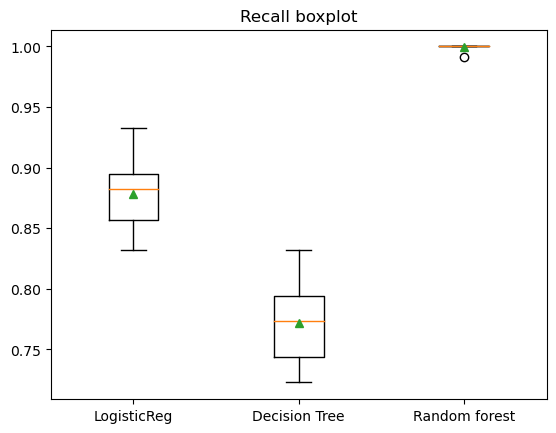

In [119]:
#Testing iterations

resultados = list()
tabla = list()
f1_list = list()

for i in range(len(modelos)):

    pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])
    #Ejercicio 4.-c.  
    # Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    
    mismetricas = {'precision':make_scorer(mi_precision), 'recall':make_scorer(mi_recall),'f1score':make_scorer(mi_f1score), 'gmean':make_scorer(mi_gmean) }

    # Train and validation scoring
    scores = cross_validate(pipeline, Xtv, np.ravel(ytv), scoring=mismetricas , cv=cv, return_train_score=True)

    # Returns a 2D Dataframe with each defined scoring like this (n_splits x n_repeats):
    ###            fit_time  score_time  test_accuracy  test_gmean  test_f1
    ###        0   0.054359    0.011969        0.73750    0.615554     0.866071
    ###        1   0.062003    0.011998        0.71875    0.627376     0.821429
    ###        2   0.059530    0.011961        0.80000    0.646505     0.955357
    ###        3   0.054882    0.011971        0.75000    0.664664     0.848214
    #print(pd.DataFrame(scores))
    resultados.append(scores) 
    #print(scores.mean())

    tabla.append([nombres[i], np.mean(scores['test_precision']), np.mean(scores['train_precision']),
                     np.mean(scores['test_recall']), np.mean(scores['train_recall']),
                     np.mean(scores['test_f1score']), np.mean(scores['train_f1score']),
                     np.mean(scores['test_gmean']), np.mean(scores['train_gmean'])])

#To see the returned scores from the cross validation
#print(scores.keys())

print("Printing on a beautiful table:")
print(tabulate(tabla, 
        headers=[nombres[i], 'test_precision', 'train_precision', 
                             'test_recall', 'train_recall',
                             'test_f1score', 'train_f1score',
                             'test_gmean', 'train_gmean'], 
        tablefmt="github", 
        floatfmt=".2f"
   	))


Box_plott_Recall = list()
for i in range(len(resultados)):
    rr = resultados[i]['test_recall']
    #print(rr)
    Box_plott_Recall.append(rr)

plt.figure(2)
plt.title("Recall boxplot")
plt.boxplot(Box_plott_Recall, labels=nombres, showmeans=True)
plt.show(block=True);

Curvas

Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando
el tamaño de la muestra para el modelo de regresión Logística con su
hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de
los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del
desempeño de dicha función “learning_curve()”.

In [120]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, label):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(label)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

c:\Users\genar\.conda\envs\master_AI_ML\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\genar\.conda\envs\master_AI_ML\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\genar\.conda\envs\master_AI_ML\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\genar\.conda\envs\master_AI_ML\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\genar\.conda\envs\master_AI_ML\

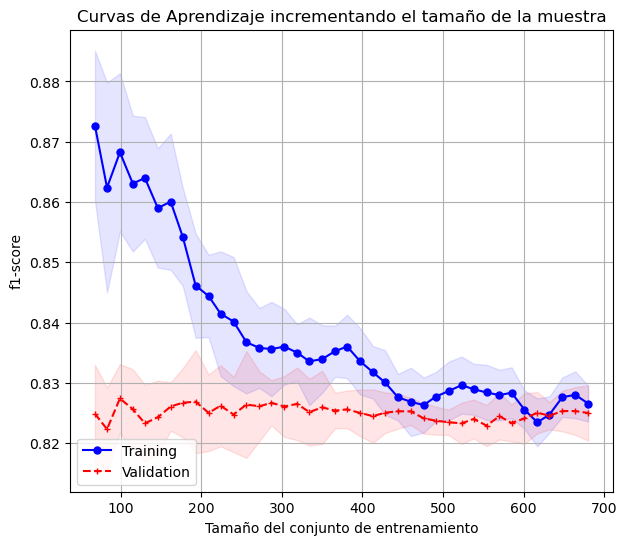

In [121]:
#Ejercicio 4.-6  i
"""
Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando 
el tamaño de la muestra para el modelo de regresión Logística con su 
hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de 
los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del 
desempeño de dicha función “learning_curve()”. 
"""
def mi_ModeloYCurvas(Xin, pipeline, cv, scoring):

       modelo = LogisticRegression(max_iter=1000, random_state=1)

       delta_train_sz = np.linspace(0.1, 1, 40)

       # Other possible scorings check sklearn.metrics.SCORERS.keys()
       tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xin,
                                                        y = ytv,
                                                        cv = cv ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=11,scoring ='f1')

       # Obtenemos el gráfico con las curvas de aprendizaje para f1 score:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'f1-score')

mi_ModeloYCurvas(Xtv, pipeline, cv, 'f1')


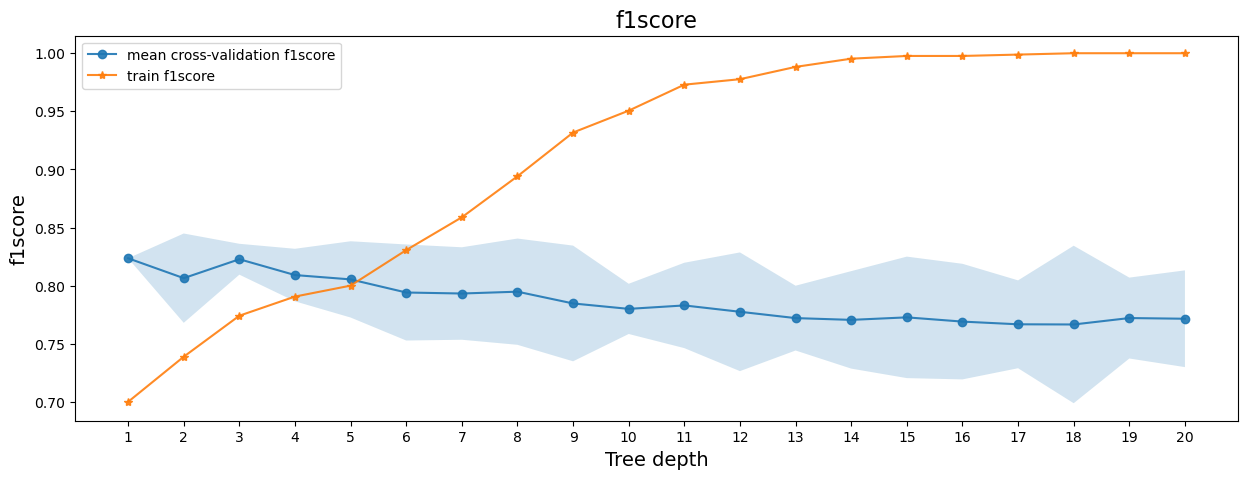

In [122]:
#Ejercicio 4.-6  ii
"""Obtener las curvas de validación (validation_curve) en la cual se va incrementando 
la complejidad del hiperparámetro “max_depth” para el modelo de árbol de 
decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima 
profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del 
desempeño del modelo. 
"""

#function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='f1'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    f1_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        f1_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    f1_scores = np.array(f1_scores)
    return cv_scores_mean, cv_scores_std, f1_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, f1_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation f1score', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    #ylim = plt.ylim()
    ax.plot(depths, f1_scores, '-*', label='train f1score', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('f1score', fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 20
sm_tree_depths = range(1,21)
sm_cv_scores_mean, sm_cv_scores_std, sm_f1_scores = run_cross_validation_on_trees(Xtv, ytv, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_f1_scores, 'f1score') 


c:\Users\genar\.conda\envs\master_AI_ML\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\genar\.conda\envs\master_AI_ML\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\genar\.conda\envs\master_AI_ML\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\genar\.conda\envs\master_AI_ML\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\genar\.conda\envs\master_AI_ML\

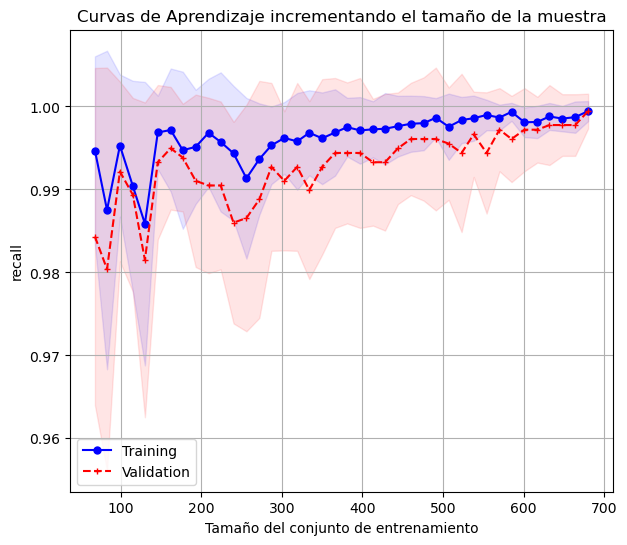

In [123]:
#Ejercicio 4.-6  iii
"""
Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando 
el tamaño de la muestra para el modelo de regresión bosque aleatorio (random 
forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en 
la partición de los conjuntos de entrenamiento y la métrica “recall”, como 
evaluación del desempeño del modelo. 
"""

def mi_ModeloYCurvas(Xin, pipeline, cv, scoring):

       modelo = LogisticRegression(max_iter=1000, random_state=1)

       delta_train_sz = np.linspace(0.1, 1, 40)

       # Other possible scorings check sklearn.metrics.SCORERS.keys()
       tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xin,
                                                        y = ytv,
                                                        cv = cv ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=11,scoring ='recall')

       # Obtenemos el gráfico con las curvas de aprendizaje para f1 score:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'recall')

mi_ModeloYCurvas(Xtv, pipeline, cv, 'recall')



#**Ejercicio-5.**

In [124]:
None

#**Ejercicio-6.**

In [125]:
None

###**Fin de la Actividad de la semana 6.**